![title](./media/walmart_christmas.jpg)

# Walmart: Weihnachtsgeschäft Just in Time

Modulprojekt für die Vorlesung __Data-Mining-Process__

_Dozent:_ Prof. Dr. Johannes Maucher  
_Studenten:_ Stephanie Flohr, Benedikt Haußner, Robert Masendorf  
_Abgabetermin:_ 24.09.2018

**Hinweis:** Zu korrekten Darstellung der Ergebnisse in den MarkDowns müsste die Nbextension ```Python Markdown``` aktiviert sein. Zusätzlich müsste ein ```Trusted```Kernel verwendet werden.  
Leider werden die Werte trotzdem nicht übernommen, wenn man ```html``` aus dem Notebook generiert.  
Daher wurden die fraglichen Informationen in der hier vorliegenden Version wieder über ```print```-Statements ausgegeben.

Für unser Projekt analysiseren wir Verkaufsdaten der amerikanischen Supermarktkette _Walmart_.

**Vorgehensmodell:** Wir gehen nach dem Vorgehensmodell CRISP-DM vor.

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="400"/>

Quelle: [Wikipedia](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining), da das originale Dokument im Internet fast nicht mehr zu finden ist.

## BUSINESS UNDERSTANDING: Ursprung und grober Inhalt des Datensatzes

### Was ist Walmart?
Walmart ist der wertvollste Einzelhändler der Welt mit einer Marktkapitalisierung von 246,2 Mrd. US-Dollar. Weitere Fakten:
+ Anzahl Filialen weltweit: ca 11.600
+ Jahresumsatz 2017: 50,3 Mrd. US-Dollar
+ Gewinn 2017: 9,9 Mrd. US-Dollar
+ Anzahl der Mitarbeiter weltweit: ca 2 Millionen

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Walmart)

### _Just in Time_ bei Walmart
[Wikipedia](https://de.wikipedia.org/wiki/Walmart)

Walmarts Strategie beruht auf ein Konzept aus geringen Preisen und gewinnmargen begleitet durch geringe Lohn- und Gehaltzahlungen trotz hohem Profit. Ein wichtiger Baustein in diesem Konzept ist auch die Produktion nach Just in Time. Walmart unterhält keine Warenlager, sondern entwickelte eine ausgefeilte Logistik, durch die die Produkte direkt aus der Produktion zu den Logistzentren geliefert werden. Dadurch sind keine Zwischenlager mehr notwendig. Um dieses Konzept weltweit umsetzen zu können, beschäftigt Walmart 2000 Analysten. 

### Wettbewerb auf Kaggle
[Walmart - Nähere Informationen zur Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting).

Walmart stellt den genutzen Datensatz auf Kaggle für einen Bewerberwettbewerb zur Verfügung. Mit dem Wettbewerb möchte Waltmart die besten Kandidaten für zukünftige Mitarbeiter herausfiltern. Den Bewerbern gibt diese Competition die Möglichkeit, ihr Können vorzuzeigen. 

Der Datensatz beinhaltet historische Verkaufdaten von 45 Walmart Märkten an unterschiedlichen Standorten. Diese sind widerum in sich in unterschiedliche Abteilungen unterteilt. Es gilt je Bereich eine Analyse der Salesdaten zu entwickeln und damit vorhersagen, welcher Bereich am effektivsten arbeitet.

### Ziel unserer Arbeit
Dieses Assignment hat nicht das Ziel, an dem Wettbewerb mitteilzunehmen. Wir haben uns als Ziel gesetzt, aus dem Daten zum Vorweihnachtsgeschäft aus 2010 das Vorweihnachtsgeschäft für 2011 vorhersagen zu können. 

## DATA UNDERSTANDING: Was wissen wir und was wollen wir wissen?

In der zweiten Phase des CRISP-VGMs betrachten wir die uns zur Verfügung stehenden Daten.  
Dabei beantworten wir folgende Fragen:
+ Was sind die Quellen unserer Daten?
+ Wie sind die uns zur Verfügung stehenden Dateien aufgebaut?
+ Welche Wertbereiche umfassen die Daten und welche Verteilungen sind zu erkennen?
    + Gibt es dabei Dinge, die wir so nicht erwartet hätten?
+ Genügt die Qualität der Daten, um in die Phase der Data Preparation übertreten zu können?

### Initiale Datensammlung

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


Das von Walmart zur Verfügung gestellte Datenpaket beinhaltet drei für uns relevante csv-Dateien:
+ ```train.csv```
+ ```features.csv```
+ ```stores.csv```

Die beiden Dateien ```test.csv``` und ```sampleSubmission.csv``` sind nur für den Wettbewerb interessant und werden daher hier nicht behandelt.  
Weitere Informationen zu den einzelen Datasets: [Walmart - Data](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)

### Beschreibung der Daten

Im Folgenden werden die Attribute der einzelnen csv-Dateien kurz dargestellt.

#### train.csv

In [3]:
data_df = pd.read_csv('./data/train.csv')
display(data_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Die Attribute ```Store```, ```Dept```und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Dept```: pro Filiale eindeutige Abteilungs-ID
+ ```Date```: Enddatum der Woche, für die die Verkäufe summiert wurden
+ ```Weekly_Sales```: Wochenumsatz pro Abteilung und Filiale
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag

#### features.csv

In [4]:
features_df = pd.read_csv('./data/features.csv')
display(features_df.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Die Attribute ```Store``` und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Date```: Enddatum der Woche
+ ```Temperature```: gemittelte Temperatur der Woche
+ ```Fuel_Price```: gemittelter Benzinpreis der Woche
+ ```MarkDown 1-5```: Metriken, die Auskunft über spezielle Werbeangebote der Woche geben
+ ```CPI```: Verbraucherpreisindex der Woche
+ ```Unemployment```: Arbeitslosenquote der Woche
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag
    + Duplikat des Attributs selbigen Namens in der Datei ```train.csv```

#### stores.csv

In [5]:
stores_df = pd.read_csv('./data/stores.csv')
display(stores_df.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


+ ```Store```: eindeutige Filial-ID
+ ```Type```: Typ der Filiale (wobei die drei Klassen ```A```, ```B```und ```C``` vorhanden sind)
+ ```Size```: Größe der Filiale
    + Nachdem die Daten anonymisiert sind, sind die Angaben nicht in m<sup>2</sup> oder ft<sup>2</sup> , sondern abstrahiert zu verstehen.

### Datenexploration

Im Folgenden sollen die einzelnen Datensätze getrennt voneinander untersucht werden.  
Von besonderem Interesse sind Wertebereiche, Extremwerte und fehlende Werte.

#### Train - Datensatz

Der Datensatz ```train.csv``` enthält die Attribute ```Store```, ```Dept```, ```Date```, ```Weekly_Sales``` und ```IsHoliday```.

Im Folgenden untersuchen wir die einzelnen Attribute, wobei wir uns auf einzelne, interessante Fragestellungen beschränken, anstatt komplette univariate Analysen auszugeben.  

Das Attribut ```IsHoliday``` wird hier auch von der Anzahl der Abteilungen beeinflusst.  
Nachdem das Attribut auch im Datensatz ```features.csv``` vorkommt, wird es dort betrachtet.

__Store__

In [6]:
print(data_df.Store.nunique())

45


Der Datensatz umfasst __45 einzelne Stores__.

__Dept__

In [7]:
print("Abteilungen:",data_df.Dept.nunique())
print("IDs: ",data_df.Dept.min()," bis ",data_df.Dept.max())

Abteilungen: 81
IDs:  1  bis  99


Es gibt insgesamt __81 verschiedene Abteilungen__.  
Die IDs der Abteilungen reichen dabei von **1 bis 99**.

Fraglich ist, ob jeder Store auch tatsächlich jede Abteilung beherbergt. Die rote Linie im folgenden Plot stellt die Anzahl der tatsächlich existierenden Abteilungstypen im Datensatz dar:

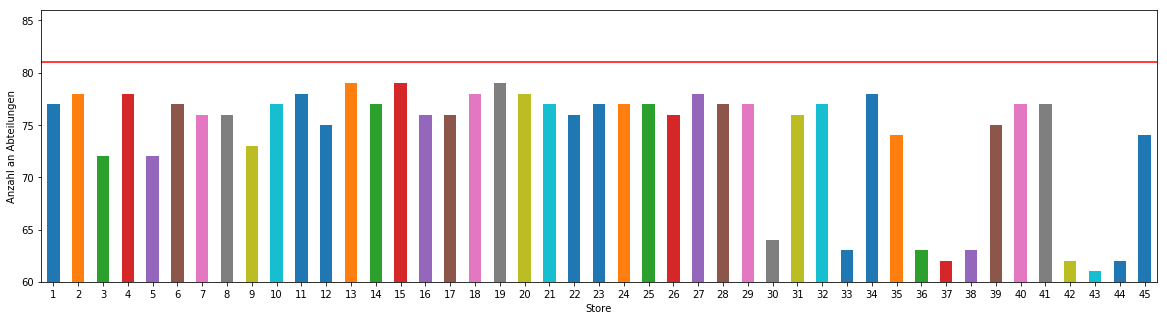

In [8]:
data_df.groupby('Store')['Dept'].nunique().plot(figsize=(20, 5), kind='bar', rot=0).set_ylabel('Anzahl an Abteilungen')
plt.axhline(data_df.Dept.nunique(), color='red')
plt.ylim(60, data_df.Dept.nunique() + 5)
plt.show()

In [9]:
print("Anzahl Abteilungen im kleinsten Store:\t",data_df.groupby('Store')['Dept'].nunique().min())
print("Anzahl Abteilungen im größten Store:\t",data_df.groupby('Store')['Dept'].nunique().max())

Anzahl Abteilungen im kleinsten Store:	 61
Anzahl Abteilungen im größten Store:	 79


Wir können beobachten, dass es nicht einen einzigen Store gibt, der alle Abteilungen unter einem Dach vereint.  
__Der kleinste Store umfasst dabei 61 Abteilungen, der größte 79 Abteilungen__.

Weiterhin ist von Interesse, ob es Abteilungen gibt, die in jedem Store vorhanden sind oder eben nicht:

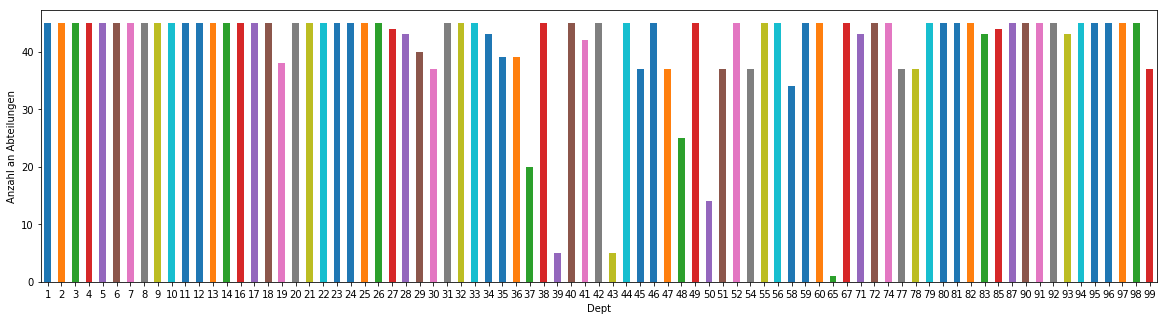

In [10]:
dept_in_stores_series = data_df.groupby('Dept')['Store'].nunique()
dept_in_stores_series.plot(figsize=(20, 5), kind='bar', rot=0).set_ylabel('Anzahl an Abteilungen')
plt.show()

In [11]:
print("Anzahl Abteilungen, die in jedem Store vorhanden sind:",dept_in_stores_series.value_counts()[45])
print("Prozentualer Anteil zu allen Abteilungen:",int(dept_in_stores_series.value_counts(normalize=True)[45]*100))
print("Abteilung, die es nur in einem Store gibt:",dept_in_stores_series[dept_in_stores_series==1].index.values[0])

Anzahl Abteilungen, die in jedem Store vorhanden sind: 54
Prozentualer Anteil zu allen Abteilungen: 66
Abteilung, die es nur in einem Store gibt: 65


Insgesamt gibt es __54 Abteilungen, die in jedem Store vertreten sind__, das sind ca 66 Prozent aller Abteilungen.  
__Abteilung 65 gibt es nur in einem einzigen Store__. Sie ist dabei die einzige Abteilung, die in nur einem Store existiert.

__Date__

In [12]:
print("Datum ältester Messwert:\t\t",data_df.Date.min())
print("Datum jüngser Messwert:\t\t\t",data_df.Date.max())
print("Anzahl Tage, an denen gemessen wurde:\t",data_df.Date.nunique())

Datum ältester Messwert:		 2010-02-05
Datum jüngser Messwert:			 2012-10-26
Anzahl Tage, an denen gemessen wurde:	 143


Der älteste Messwert ist vom ```2010-02-05```, der jüngste Messwert ist vom ```2012-10-26```.  
Insgesamt wurde an 143 Tagen gemessen.

__Weekly Sales__

Anzahl Messpunkte:	421570
Kleinster Betrag:	-4988.94
Median:			7612.03
Durchschnitt:		15981.26
Größter Betrag:		693099.36


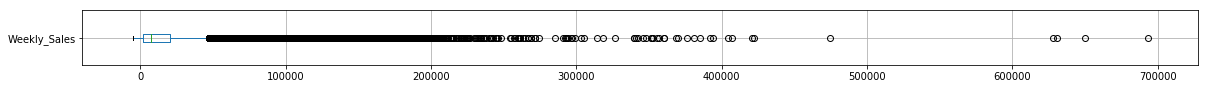

In [13]:
print("Anzahl Messpunkte:\t{}".format(data_df.Weekly_Sales.count()))
print("Kleinster Betrag:\t{}".format(data_df.Weekly_Sales.min()))
print("Median:\t\t\t{}".format(data_df.Weekly_Sales.median()))
print("Durchschnitt:\t\t{0:.2f}".format(data_df.Weekly_Sales.mean()))
print("Größter Betrag:\t\t{}".format(data_df.Weekly_Sales.max()))

pd.DataFrame(data_df.Weekly_Sales).boxplot(figsize=(20,1), vert=False)
plt.show()

__Interessant:__ es sind auch negative Werte für den Umsatz enthalten und das nicht zu knapp:  
Dieses Verhalten kann in  1285 Einzelmessungen beobachtet werden, es tritt in allen Stores und Wochen auf.  
Wie es dazu kommt wird [hier](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7152) erklärt, es wurden in der Periode Waren für mehr Wert retourniert als gekauft.

#### Features - Datensatz

Der Datensatz ```features.csv``` enthält die Attribute ```Store```, ```Date```, ```Temperature```, ```Fuel_Price```, ```Markdown 1-5```, ```CPI```, ```Unemployment``` und ```IsHoliday```.

__Store und Date__

Nachdem die Datensätze ```train.csv``` und ```features.csv``` in einem späteren Schritt über die Attribute ```Store``` und ```Date``` gejoined werden sollen, wird hier überprüft, ob ein Inner Join ohne Verluste möglich ist:

In [14]:
data_join_df = data_df[['Store', 'Date']]

features_join_df = features_df[['Store', 'Date']]
features_join_df = features_join_df[features_join_df.Date <= data_join_df.Date.max()]

cnt_rows_without_partner = len(pd.concat([data_join_df, features_join_df]).drop_duplicates(keep=False))
print("Es wurden für {} Zeilen keine Join-Partner gefunden.".format(cnt_rows_without_partner))

Es wurden für 0 Zeilen keine Join-Partner gefunden.


Ein Join ist also ohne Verluste machbar.

__Temperature__

In [15]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature.median()))

Die niedrigste gemessene Temperatur:	-7.29
Die höchste gemessene Temperatur:	101.95
Median der Temperatur:			60.71


Nachdem Nachrichten über gekochte Amerikaner auch uns in Europa erreicht hätten, gehen wir davon aus, dass die Temperatur in Fahrenheit vorliegt.  
In einem ersten Schritt wollen wir diese umrechnen:

In [16]:
def fahr_to_celsius(temp_fahr):
    return round((temp_fahr - 32) * 5 / 9, 2)

features_df['Temperature_F'] = features_df.Temperature
features_df['Temperature_C'] = features_df.Temperature.apply(lambda tmp_fahr: fahr_to_celsius(tmp_fahr))
features_df.drop(columns=['Temperature'], inplace=True)

In [17]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature_C.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature_C.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature_C.median()))

Die niedrigste gemessene Temperatur:	-21.83
Die höchste gemessene Temperatur:	38.86
Median der Temperatur:			15.95


Diese Ergebnisse ergeben durchaus mehr Sinn aus der europäischen Perspektive.

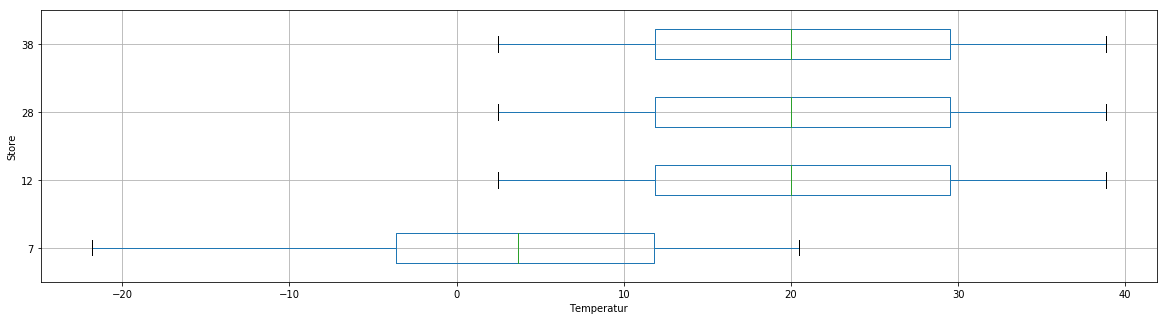

In [18]:
list_of_stores = features_df[features_df.Temperature_C == features_df.Temperature_C.min()].Store.tolist() + features_df[features_df.Temperature_C == features_df.Temperature_C.max()].Store.tolist()
temperature_store_df = pd.DataFrame()

for store in list_of_stores:
    temperature_store_df[store] = features_df.Temperature_C[features_df.Store == store].tolist()
    temperature_store_df.reset_index(drop=True, inplace=True)
    
temperature_store_df.boxplot(figsize=(20,5), vert=False)
plt.xlabel("Temperatur")
plt.ylabel("Store")
plt.show()

Man kann sehen, dass sich die zweiten und dritten Quantile des Stores mit der tiefsten gemessenen Temperatur und die der Stores mit der höchsten gemessenen Temperatur nur knapp berühren.  
Die Stores liegen regional also weit verteilt.  
Zudem scheinen die drei Stores mit der höchsten gemessenen Temperatur im Bezug auf die Wettererfassung nah beieinander zu liegen.

__Fuel_Price__

Der niedrigste Preis pro Gallone Sprit:		2.472
Der höchste Preis pro Gallone Sprit:		4.468
Median des Spritpreises pro Gallone:		3.513


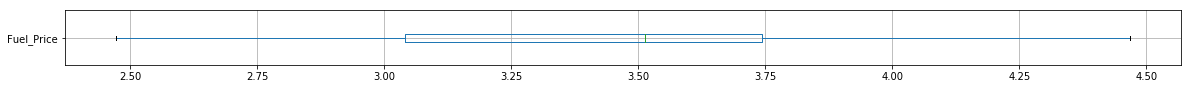

In [19]:
print("Der niedrigste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.min()))
print("Der höchste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.max()))
print("Median des Spritpreises pro Gallone:\t\t{}".format(features_df.Fuel_Price.median()))

pd.DataFrame(features_df.Fuel_Price).boxplot(figsize=(20,1), vert=False)
plt.show()

__MarkDown 1-5__

Der Beschreibung auf [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data) entnehmen wir, dass die Werte für die Marketingaktionen erst ab November 2010 verfügbar sind. Zudem fehlen angeblich Daten für weitere Wochen.  
Nachdem wir die Werte ab September 2010 für die Prognose nutzen wollen, könnte es sein, dass die Attribute für uns wertlos sind.

Auf jeden Fall soll an dieser Stelle untersucht werden, wie es sich mit fehlenden Werten im Datensatz generell verhält:

In [20]:
pd.DataFrame(features_df.isnull().sum())

,0
Store,0
Date,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585
Unemployment,585


Wir wollen wissen, für welchen Zeitraum tatsächlich Daten der Attribute ```MarkDown 1-5``` vorhanden sind:

In [21]:
print("Erstes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.min()))
print("Letztes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.max()))

Erstes Datum mit allen Werten für MarkDown:	2011-11-11
Letztes Datum mit allen Werten für MarkDown:	2013-07-26


Nachdem wir aus den Daten von 2010 für das Weihnachtsgeschäft von 2011 lernen wollen, sind die Attribute ```MarkDown 1-5``` für uns wertlos und werden in der Phase der __Data Preparation__ entfernt.

__CPI__

Der Verbrauchspreisindex zeigt die Steigerung (oder Minderung) der Lebenshaltungskosten an.  
Dabei existieren verschiedene CPIs - mit welchem genau wir es zu tun haben und welches das Basisjahr ist, konnten wir nicht ermitteln.  

Der niedrigste Wert des CPI:	126.064
Der höchste Wert des CPI:	228.9764563
Median des CPI:			182.7640032


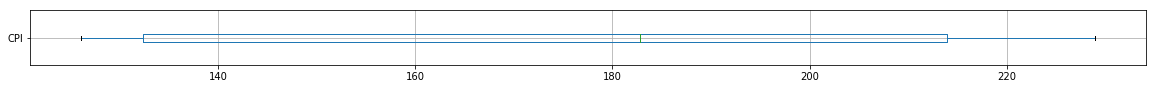

In [22]:
print("Der niedrigste Wert des CPI:\t{}".format(features_df.CPI.min()))
print("Der höchste Wert des CPI:\t{}".format(features_df.CPI.max()))
print("Median des CPI:\t\t\t{}".format(features_df.CPI.median()))

pd.DataFrame(features_df.CPI).boxplot(figsize=(20,1), vert=False)
plt.show()

Wie soeben in der Auswertung der ```MarkDown```-Attribute gesehen, fehlen auch hier Werte.  
Diese fehlenden Werte müssen, falls nötig, in der Phase der __Data Preparation__ nachberechnet werden.

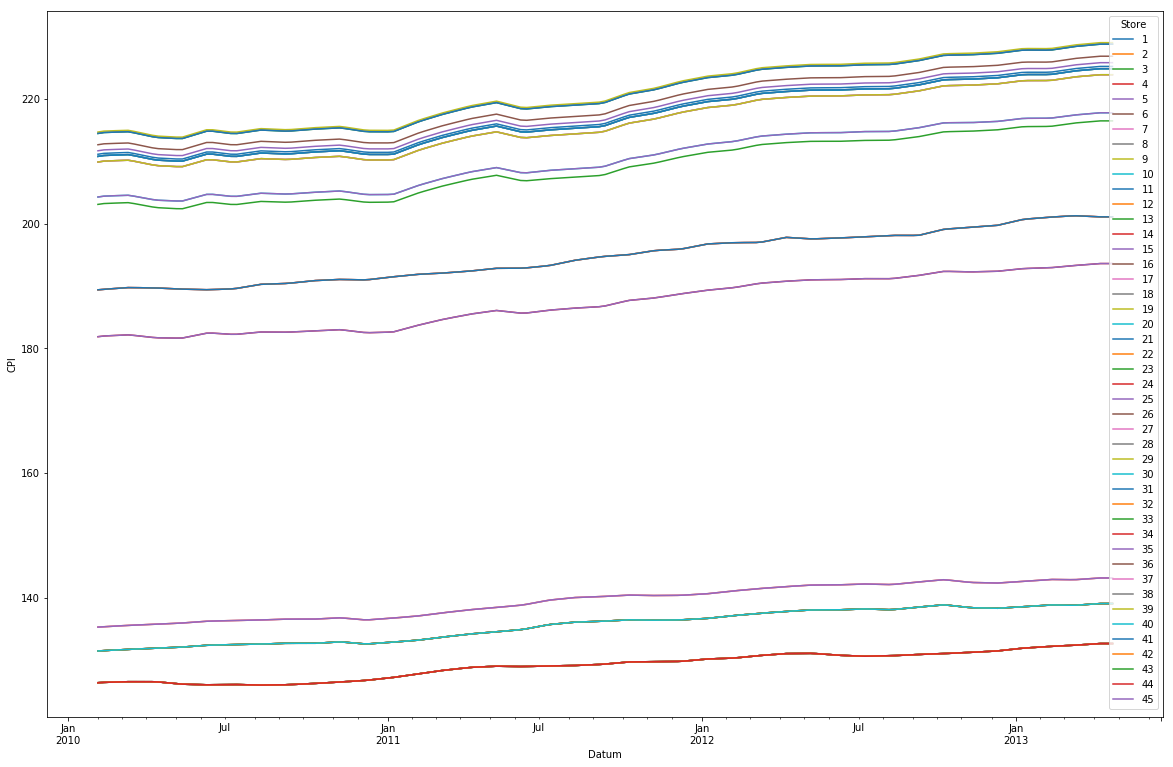

In [23]:
cpi_df = features_df.set_index(keys=['Store', 'Date'])['CPI'].unstack(level='Store')
cpi_df.index = pd.to_datetime(cpi_df.index)
cpi_df.plot(figsize=(20,13))
plt.xlabel('Datum')
plt.ylabel('CPI')
plt.show()

In [24]:
print("CPI min:",features_df.CPI.min())
print("CPI max:",features_df.CPI.max())

CPI min: 126.064
CPI max: 228.9764563


__Dieses Finding ist interessant:__  
Warum gibt es Regionen, in denen der CPI den minimalen Wert von ```126.064``` hat, im Gegensatz zu Regionen, bei denen der maximale Wert ```228.9764563```, also fast das Doppelte, beträgt?  
Zumindest in Deutschland ließe sich ein derartiger Unterschied im Einzelhandel nicht regional beurteilen.  
Wir werden dieses Thema später eventuell nochmals aufgreifen.

__Unemployment__

Der niedrigste Wert des Unemployment:	3.6839999999999997
Der höchste Wert des Unemployment:	14.312999999999999
Median des Unemployment:		7.806


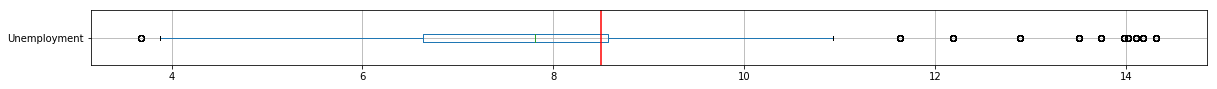

In [25]:
print("Der niedrigste Wert des Unemployment:\t{}".format(features_df.Unemployment.min()))
print("Der höchste Wert des Unemployment:\t{}".format(features_df.Unemployment.max()))
print("Median des Unemployment:\t\t{}".format(features_df.Unemployment.median()))

mean_umempl_usa_201011 = (8.9 + 8.1) / 2

pd.DataFrame(features_df.Unemployment).boxplot(figsize=(20,1), vert=False)
plt.axvline(x=mean_umempl_usa_201011, color='red')
plt.show()

In [26]:
print("Mean unenployment USA:",mean_umempl_usa_201011)

Mean unenployment USA: 8.5


Wir haben die Daten des Datensatzes mit der durchschnittlichen Arbeitslosenquote der Vereinigten Staaten aus den Jahren 2011 und 2012 (Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Arbeitsmarktstatistik_der_Vereinigten_Staaten#2011_bis_2018)) in Höhe von ```8.5``` verglichen.

Dabei zeigt sich, dass die Daten in Walmarts erhoben wurden, die potentiell eher in Regionen mit niedrigerer Arbeitslosenquote angesiedelt sind.  
Dieses zeigt sich auch in den Ausreißern: während in Q1 und Q2 die Daten eher dicht gepackt sind, streut Q3 und vor allem Q4 stark.

__IsHoliday__

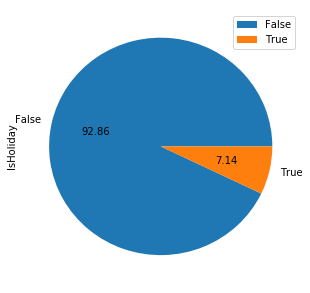

In [27]:
pd.DataFrame(features_df.IsHoliday).apply(pd.value_counts).plot.pie(figsize=(5,5), y='IsHoliday', autopct='%.2f')
plt.show()

Wie in der Grafik zu sehen, sind in ```7.14%``` der betrachteten Datensätze Feiertage zu verzeichnen.  
In diesem Zeitraum liegen unter anderem:
+ Super Bowl
+ Labor Day
+ Thanksgiving
+ Black Friday
+ Weihnachten

#### Stores - Datensatz

Der Datensatz ```stores.csv``` enthält die Attribute ```Store```, ```Type``` und ```Size```.

__Store__

In [28]:
print("Store ID max:",stores_df.Store.max())
print("Store ID min:",stores_df.Store.min())

Store ID max: 45
Store ID min: 1


```Store``` stellt für die Datei den Primärschlüssel, dabei sind alle Stores von ID ```1``` bis ID ```45``` enthalten.

__Type__

In [29]:
print(stores_df.Type.unique())

['A' 'B' 'C']


Das Attribut ```Type``` enthält die Werte ```A```, ```B``` und ```C```.  
Es gibt folgende unterschiedliche Typen von Märkten (Quelle: [Walmart Store Locator](https://corporate.walmart.com/our-story/our-business)), wobei wir uns nicht sicher sind, inwieweit dies gemapped werden kann:
+ Walmart Supercenter
+ Walmart Discount Store
+ Walmart Neighbourhood Market

Die Verteilung der Store-Typen gestaltet sich wie folgt:

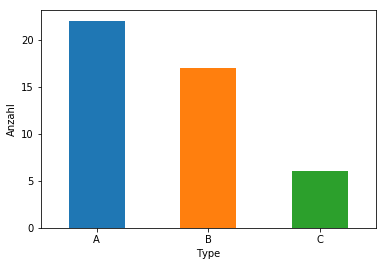

In [30]:
stores_df.groupby('Type')['Type'].count().plot(kind='bar', rot=0)
plt.ylabel("Anzahl")
plt.show()

__Size__

In [31]:
print("min store size:",stores_df.Size.min())
print("max store size:",stores_df.Size.max())

min store size: 34875
max store size: 219622


Nachdem die Daten anonymisiert sind, kann keine definitive Aussage darüber getroffen werden, in welcher Einheit die gegebenen Werte im Bereich von ```34875``` bis ```219622``` vorliegen.  
Allerdings entsprechen die Durchschnittswerte für die einzelnen Typen ziemlich exakt den Typen von Walmarts, die im letzten Punkt angesprochen worden waren:

<img src="./media/walmart_types.jpg" width="800"/>

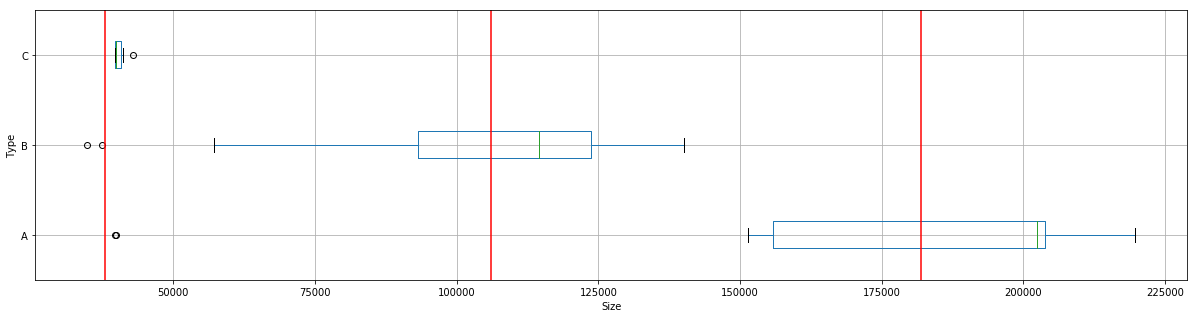

In [32]:
size_a_type = 182000
size_b_type = 106000
size_c_type = 38000

stores_df.boxplot(column='Size', by='Type', vert=False, figsize=(20,5))
plt.axvline(x=size_a_type, color='red')
plt.axvline(x=size_b_type, color='red')
plt.axvline(x=size_c_type, color='red')

plt.suptitle('')
plt.title('')
plt.xlabel('Size')
plt.ylabel('Type')
plt.show()

Wir gehen also davon aus, dass die drei Typen ```A, B und C``` die offiziellen Markt-Kategrien repräsentieren.

#### Erste Hypothesen
Um erste Hypothesen aufstellen zu können, die über unsere bisherigen Betrachtungen (beispielsweise zur Arbeitslosenquote) hinausgehen, müssen wir die Datensätze miteinander verbinden. Hierfür verweisen wir auf die Phase der __Data Preparation__.

### Betrachtung der Datenqualität
Die mangelnde Qualität der Features ```MarkDown 1-5``` wurde bereits angesprochen.  
Darüber hinausgehende Aussagen können erst in der Phase der __Data Preparation__ getroffen werden.

Auf den ersten Blick sieht es so aus, als würden die zur Verfügung stehenden Daten ausreichen, um erste Modelle zu bauen. Sie enthalten vorerst alle wichtigen Informationen. Falls die Qualität der Modelle nicht zufriedenstellend ist, ist die Struktur geeignet, um durch weitere Daten erweitert zu werden. 

## DATA PREPARATION: Neural Net Approach

Im Folgenden bereiten wir die soeben untersuchten Daten für das Modellieren vor.  
Dabei wird zuerst ein __zeitlicher Zuschnitt__ erfolgen, an den sich ein __Feature Engineering__ anschließt.  
Nach einer __Normalisierung__ sollen die Daten in 3D-Numpy-Arrays aufgebaut werden, um ein Training mit __Moving Window__ in __neuronalen Netzen__ zu ermöglichen.

### Zeitlicher Zuschnitt der Daten auf das Projektziel

Wie bereits erwähnt, ist es unser Ziel, aus den Daten von 2010 und 2011 das Weihnachtsgeschäft des Jahres 2011 zu prognostizieren. Daher fokussieren wir uns auf diesen Zeitraum:

In [33]:
data_df.Date = pd.to_datetime(data_df.Date)

In [34]:
xmas_data_df = data_df[((data_df.Date >= '2010-02-05') & (data_df.Date <= '2011-12-31'))]
xmas_data_df.reset_index(inplace=True, drop=True)

In [35]:
display(xmas_data_df.loc[(xmas_data_df['Store'] == 1) & (xmas_data_df['Dept'] ==1)].head(2))
display(xmas_data_df.loc[(xmas_data_df['Store'] == 1) & (xmas_data_df['Dept'] ==1)].tail(2))

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


,Store,Dept,Date,Weekly_Sales,IsHoliday
98,1,1,2011-12-23,46788.75,False
99,1,1,2011-12-30,23350.88,True


In [36]:
print("Zeitraum der Daten:",xmas_data_df.Date.nunique())

Zeitraum der Daten: 100


Wir betrachten also einen Zeitraum von ```100``` Wochen.

Fraglich ist, ob die Daten von zwei Jahren hier schon ausreichend einem Muster folgen - speziell, weil wir direkt die Ergebnisse des zweiten Weihnachtsgeschäfts prognostizieren wollen.  
Dazu visualisieren wir die beiden Jahre und betrachten vor allem die Wochen vor Weihnachten:

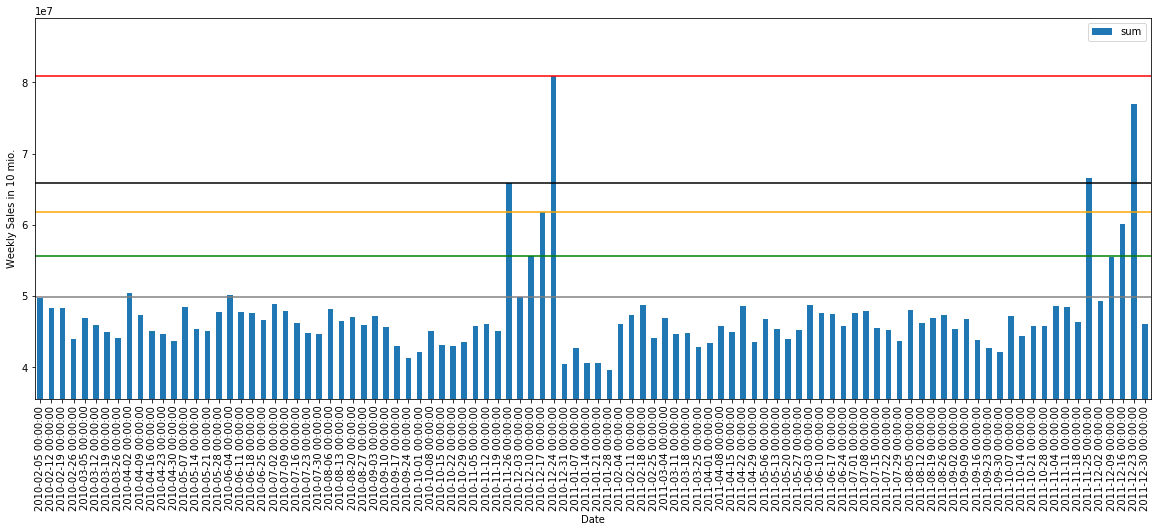

In [37]:
xmas_data_df.groupby('Date').agg(['sum']).reset_index().plot(x='Date', y='Weekly_Sales',kind="bar", figsize=(20,7)).set_ylabel("Weekly Sales in 10 mio.")
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-11-26'].agg(['sum'])[0], color='black')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-03'].agg(['sum'])[0], color='grey')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-10'].agg(['sum'])[0], color='green')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-17'].agg(['sum'])[0], color='orange')
plt.axhline(y=xmas_data_df['Weekly_Sales'][xmas_data_df.Date == '2010-12-24'].agg(['sum'])[0], color='red')
# Anpassung y-Achse über min- und max-Werte mit Faktor 0.1
plt.ylim(xmas_data_df.groupby('Date').agg(['sum']).Weekly_Sales.min()[0] * 0.9, xmas_data_df.groupby('Date').agg(['sum']).Weekly_Sales.max()[0] * 1.1)
plt.show()

In dieser Grafik lässt sich ein Muster des Verlaufs der Verkaufszahlen in der Weihnachstzeit erkennen, weshalb wir erhoffen, gute Prognosen aus den Daten ableiten zu können.

### Feature Engineering

#### Warnung: nächste Woche ist ein wichtiger Feiertag

Aufgrund der Bedeutung der Feiertage für die Verkaufszahlen, erweitern wir den Datensatz um da Feature ```next_week```, das folgende Werte annehmen kann:
+ ```black_friday```
+ ```xmas_1st_week```
+ ```xmas_2nd_week```
+ ```xmas_3rd_week```
+ ```xmas_4th_week```
+ ```new_year```

Die Hoffnung ist, dass die Algorithmen aus diesem Hinweis für die nächste Woche sinnvolle Schlüsse ziehen können.

In [38]:
xmas_data_df.loc[xmas_data_df.Date == '2010-11-19', 'next_week'] = 'black_friday'
xmas_data_df.loc[xmas_data_df.Date == '2010-11-26', 'next_week'] = 'xmas_1st_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-03', 'next_week'] = 'xmas_2nd_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-10', 'next_week'] = 'xmas_3rd_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-17', 'next_week'] = 'xmas_4th_week'
xmas_data_df.loc[xmas_data_df.Date == '2010-12-24', 'next_week'] = 'new_year'

xmas_data_df.loc[xmas_data_df.Date == '2011-11-18', 'next_week'] = 'black_friday'
xmas_data_df.loc[xmas_data_df.Date == '2011-11-25', 'next_week'] = 'xmas_1st_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-02', 'next_week'] = 'xmas_2nd_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-09', 'next_week'] = 'xmas_3rd_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-16', 'next_week'] = 'xmas_4th_week'
xmas_data_df.loc[xmas_data_df.Date == '2011-12-23', 'next_week'] = 'new_year'

#### Wie lange dauerts noch bis Weihnachten?

Zusätzlich wäre es interessant zu erfahren, wie viele Tage es noch bis Weihnachten sind.  
Dazu dient das Feature ```days_2_xmas```:

In [39]:
xmas_data_df['days_2_xmas'] = xmas_data_df.Date.apply(lambda x: (date(x.year,12,25) - x.date()).days)
xmas_data_df[['Date', 'days_2_xmas']].head()

,Date,days_2_xmas
0,2010-02-05,323
1,2010-02-12,316
2,2010-02-19,309
3,2010-02-26,302
4,2010-03-05,295


### Umgang mit kategorialen Daten

Sowohl das soeben erstellte Attribut ```next_week```, als auch die Attribute ```Store_Type``` und ```IsHoliday``` sollten betrachtet werden, da die von uns eingesetzten neuronalen Netze nicht mit kategorialen Daten umgehen können.

#### next_week

Hier können wir praktischerweise die von ```pandas``` mitgelieferte Funktion ```get_dummies``` nutzen:

In [40]:
xmas_data_df = pd.get_dummies(data=xmas_data_df, columns=['next_week'], prefix='nw')

In [41]:
xmas_data_df[(xmas_data_df.Store == 1) & (xmas_data_df.Dept == 1) & (xmas_data_df.Date >= '2010-11-12') & (xmas_data_df.Date < '2010-12-31')]

,Store,Dept,Date,Weekly_Sales,IsHoliday,days_2_xmas,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week
40,1,1,2010-11-12,19549.39,False,43,0,0,0,0,0,0
41,1,1,2010-11-19,19552.84,False,36,1,0,0,0,0,0
42,1,1,2010-11-26,18820.29,True,29,0,0,1,0,0,0
43,1,1,2010-12-03,22517.56,False,22,0,0,0,1,0,0
44,1,1,2010-12-10,31497.65,False,15,0,0,0,0,1,0
45,1,1,2010-12-17,44912.86,False,8,0,0,0,0,0,1
46,1,1,2010-12-24,55931.23,False,1,0,1,0,0,0,0


#### Store_Type

In [42]:
if 'Type' in stores_df.columns:
    stores_df = pd.get_dummies(data=stores_df, columns=['Type'], prefix='type')
stores_df.head()

,Store,Size,type_A,type_B,type_C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


#### IsHoliday

Eine gesonderte Behandlung für ```IsHoliday``` nicht eventuell nötig, weil ```boolean```sich in ```int``` casten lässt.  
Wir gehen allerdings auf Nummer sicher und nehmen den Netzen diese Arbeit ab:

In [43]:
features_df.IsHoliday = features_df.IsHoliday.astype(int)
features_df.head()

,Store,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C
0,1,2010-02-05,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,42.31,5.73
1,1,2010-02-12,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,38.51,3.62
2,1,2010-02-19,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,39.93,4.41
3,1,2010-02-26,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,46.63,8.13
4,1,2010-03-05,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,46.50,8.06


### Merge Datasets

Da das Feature ```IsHoliday``` neben dem soeben umgewandelten ```IsHoliday``` noch redundant im File ```train.csv``` vorhanden ist, wird dieses hier gedroppt:

In [44]:
features_df.Date = pd.to_datetime(features_df.Date)
if 'IsHoliday' in xmas_data_df.columns:
    xmas_data_df.drop(columns=['IsHoliday'],inplace=True)

Nachdem wir die Daten so erstellt haben, wie wir sie für den ersten Versuch nutzen wollen, können die Datensets ```features_df```, ```stores_df``` und ```xmas_data_df``` gemerged werden.

In [45]:
merged_df = pd.merge(xmas_data_df,features_df,on=['Store','Date'])
merged_all_df = pd.merge(merged_df,stores_df,on='Store')
merged_all_df.head()

,Store,Dept,Date,Weekly_Sales,days_2_xmas,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,...,MarkDown5,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C,Size,type_A,type_B,type_C
0,1,1,2010-02-05,24924.50,323,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
1,1,2,2010-02-05,50605.27,323,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
2,1,3,2010-02-05,13740.12,323,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
3,1,4,2010-02-05,39954.04,323,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0
4,1,5,2010-02-05,32229.38,323,0,0,0,0,0,...,NaN,211.096358,8.106,0,42.31,5.73,151315,1,0,0


### Clean Data

Wie man in der Ausgabe oben sehen kann, enthält der Datenbestand noch __```NaN```-Werte__. Nachdem ein geeigneter Umgang mit diesen gefunden wurde, sollen noch die __Korrelationen__ betrachtet werden, um eventuell vorhandene und quasi redundante Features zu entfernen.

#### Umgang mit NaN

Zuerst können direkt wie bereits erwähnt die Attribute ```MarkDown 1-5 ``` entfernt werden:

In [46]:
if 'MarkDown1' in merged_all_df.columns:
    merged_all_df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True)
merged_all_df.head()

,Store,Dept,Date,Weekly_Sales,days_2_xmas,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,...,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_F,Temperature_C,Size,type_A,type_B,type_C
0,1,1,2010-02-05,24924.50,323,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
1,1,2,2010-02-05,50605.27,323,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
2,1,3,2010-02-05,13740.12,323,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
3,1,4,2010-02-05,39954.04,323,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0
4,1,5,2010-02-05,32229.38,323,0,0,0,0,0,...,2.572,211.096358,8.106,0,42.31,5.73,151315,1,0,0


Anschließend wird noch geklärt, inwieweit weitere ```NaN```-Werte vorhanden sind:

In [47]:
merged_all_df.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
days_2_xmas         0
nw_black_friday     0
nw_new_year         0
nw_xmas_1st_week    0
nw_xmas_2nd_week    0
nw_xmas_3rd_week    0
nw_xmas_4th_week    0
Fuel_Price          0
CPI                 0
Unemployment        0
IsHoliday           0
Temperature_F       0
Temperature_C       0
Size                0
type_A              0
type_B              0
type_C              0
dtype: int64

Hier scheinen wir Glück gehabt zu haben, weitere Aktionen wie Mitteln etc. von Werten sind nicht nötig.

#### Korrelationen

Im Folgenden plotten wir uns die Korrelationsmatrix für unsere Features.  
Der Code ist der [Seaborn Doku](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) entnommen und leicht angepasst.

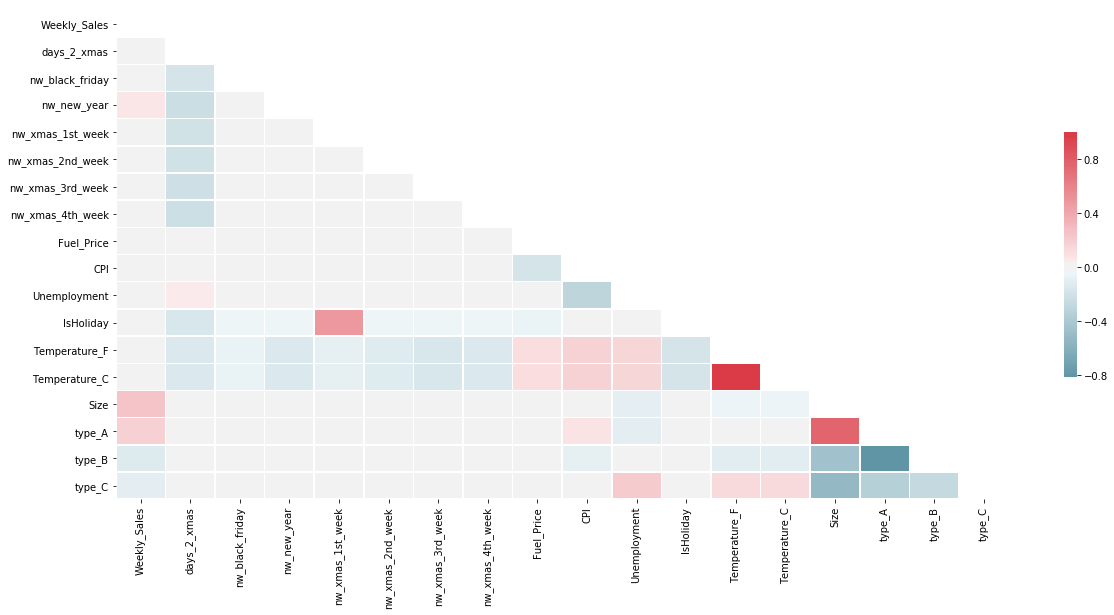

In [48]:
corr = merged_all_df.iloc[:,3:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Man kann direkt erkennen, dass es eine hohe Korrelation der Features ```Temperature_F``` und ```Temperature_C``` gibt - was verständlich ist, da wir ```Temperature_F``` selbst umgerechnet haben. Wir löschen ```Temperature_F```.

In [49]:
if 'Temperature_F' in merged_all_df.columns:
    merged_all_df.drop(columns='Temperature_F',inplace=True)

Es freut uns natürlich, dass es eine Korrelation zwischen ```nw_new_year``` und ```Weekly_Sales``` gibt - diese Feature könnte also genutzt werden, um dieses einmalige Ereignis wiederzuerkennen.  

Zwischen ```nw_xmas_1st_week``` und ```IsHoliday``` besteht ein Zusammenhang, da in dieser Woche immer der _Black Friday_ liegt.

Spannend ist auch, dass es anscheinend einen Zusammenhang zwischen der ```Temperatur_C``` und ```Fuel_Price```, ```Unemployment``` und ```CPI``` gibt - während ```CPI```und ```Fuel_Price``` tatsächlich eine negative Korrelation aufweisen und ```Unemployment``` und ```Fuel_Price``` neutral zueinander stehen.  
Dass ```CPI``` und ```Unemployment``` wiederum negativ korrelieren ergibt Sinn.

Auch, dass es anscheinend an den interessanten Feiertagen eher kälter ist, überrascht nicht.

Auch die Zusammenhänge zwischen (Store-)```Size```, (Store-)```Type``` und absoluten ```Weekly_Sales``` überrascht nicht.

In [50]:
print("Anzahl Messpunkte im Datensatz:",merged_all_df.shape[0])
print("Anzahl Attribute:",merged_all_df.shape[1])

Anzahl Messpunkte im Datensatz: 294132
Anzahl Attribute: 20


__Fazit:__
Wir sind am Ende der Datenbereinigung angekommen und haben damit einen Datensatz mit ```294132``` Messpunkten und aktuell ```20``` Attributen.

### Normalize Data

An dieser Stelle würde im Normalfall eine Normalisierung der Daten anstehen, da die Skalen wie bereits gesehen sehr unterschiedlich ausfallen, nicht nur zwischen den ehemals kategorialen und den stetigen Attributen.  
Um zu ermöglichen, dass die Daten in Trainings- und Testdaten gesplittet werden können und die Normalisierung nur anhand der Trainingsdaten stattfinden kann, findet die Normalisierung in der Splitting-Funktion statt.

### Dictionary bauen: Neural Network Approach

Um die einzelnen im Folgenden erzeugten Dataframes, Arrays, Modelle ect sinnvoll im Speicher vorhalten zu können, arbeiten wir mit einem Dictionary, das in drei Ebenen angelegt ist:  
__dict [ Store-Department-Identifier ] [ einzelne Dateframes, Arrays, ect und Modeltyp [ Modell, Auswertung ect ] ]__

Die Idee haben wir von [Kevin Palmer](https://github.com/kevinpalm/walmart_sales_forecast/blob/master/final_model.py) geklaut, die Umsetzung erfolgte allerdings auf sehr unterschiedliche Weise.

In [51]:
multi_dict = {}

Die weiteren Arbeiten sollen immer auf Basis einer Store-Department-Kombination erfolgen (zb für ```Store 1``` und ```Department 1```).  
Dies bedeutet, dass pro solcher Kombination Modelle gebaut und bewertet werden sollen.  
Dazu generieren wir Identifier:

In [52]:
merged_all_df['Store_Dept'] = merged_all_df.Store.astype(str) + '_' + merged_all_df.Dept.astype(str)

In [53]:
print("Store_Dept Kombinationen:",merged_all_df.Store_Dept.nunique())

Store_Dept Kombinationen: 3302


Wir haben es insgesamt mit ```3302``` Kombinationen zu tun.

Im Folgenden werden diese Identifier genutzt, um die erste Ebene des Dictionaries anzulegen.  
Dabei ist zu beachten, dass der folgende Code nicht standardmäßig ausgeführt wird, um die weitere Ausführung des Notebooks nicht unverhältnismäßig zu verlangsamen.  
Im Bedarfsfall sollte die nächste Zelle aktiviert und die übernächste Zelle ("Abgespeckte Version") deaktiviert werden:

Damit die Prüfungen im weitern Verlauf alle funktionieren, __MUSS__ die Store-Department-Kombination ```1_1``` __IMMER__ enthalten sein!

In [54]:
store_dept_subgroup = ['1_1', '2_1']

for store_dept in store_dept_subgroup:
    multi_dict[store_dept] = {}

### Split Datasets

In diesem Unterkapitel nehmen wir die Aufspaltung nach __Trainings-, Test- und Validationsdaten__ vor.

#### Validation je Store und Depatment

<img src="./media/calendar.jpg" width="500"/>

Das Ziel ist es, aus den Daten der schwarz markierten Wochen die Verkaufszahlen der grün markierten Woche zu ermitteln. Die Daten sind dabei jeweils am Freitag für die vergangene Woche erfasst.  
Die rot markierte Woche ist überflüssig und kann gelöscht werden:

In [55]:
date_cutoff = date(2011,12,30)
merged_all_df.drop(merged_all_df[(merged_all_df.Date >= date_cutoff)].index, inplace=True)

In [56]:
print("Jüngstes Datum im Datenbestand:",merged_all_df.Date.max())

Jüngstes Datum im Datenbestand: 2011-12-23 00:00:00


Damit ist das jüngste Datum im Datenbestand der ```2011-12-23}}```.

__Anmerkung:__  
Da Bäume einen anderen Aufbau der Daten benötigen, kopieren wir den aktuellen Stand des Dataframes, da wir weitere Änderungen direkt auf dem Dataframe machen werden:

In [57]:
merged_all_for_tree_df = merged_all_df.copy()

Nun können die oben markierten Validierungsdaten für alle Store-Department-Kombinationen ermittelt und in das Dictionary gespeichert werden:

In [58]:
date_start_windowing = date(2011,11,25)
date_validation_week = date(2011,12,23)

if date_validation_week in merged_all_df.Date.dt.date.values:
    for store_dept in multi_dict.keys():
        multi_dict[store_dept]['val_data_df'] = merged_all_df[(merged_all_df.Date >= date_start_windowing)&(merged_all_df.Store_Dept == store_dept)].reset_index(drop=True)

Damit hat das Dictionary folgenden Inhalt:

In [59]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df'])

In [60]:
multi_dict['1_1']['val_data_df'][['Store', 'Dept', 'Date', 'Weekly_Sales']]

,Store,Dept,Date,Weekly_Sales
0,1,1,2011-11-25,20911.25
1,1,1,2011-12-02,25293.49
2,1,1,2011-12-09,33305.92
3,1,1,2011-12-16,45773.03
4,1,1,2011-12-23,46788.75


Um ein Leaken der Validierungsdaten ins Trainig zu verhindern, wird die entscheidende Woche aus dem Dataframe getilgt:

In [61]:
merged_all_df.drop(merged_all_df[(merged_all_df.Date == date_validation_week)].index, inplace=True)

In [62]:
print("Jüngstes Datum im Datenbestand:",merged_all_df.Date.max())

Jüngstes Datum im Datenbestand: 2011-12-16 00:00:00


Das jüngste Datum ist damit der ```2011-12-16``` und die Validierungs-Woche ist nicht mehr enthalten:

In [63]:
merged_all_df[(merged_all_df.Date >= date_start_windowing)&(merged_all_df.Store_Dept == '1_1')][['Store', 'Dept', 'Date', 'Weekly_Sales']].reset_index(drop=True)

,Store,Dept,Date,Weekly_Sales
0,1,1,2011-11-25,20911.25
1,1,1,2011-12-02,25293.49
2,1,1,2011-12-09,33305.92
3,1,1,2011-12-16,45773.03


#### Train-Test-Daten je Store und Department

Nachdem die Validierungsdaten sauber abgespeichert sind, kümmern wir uns um die Trainings- und Testdaten.  
Dabei nehmen wir auch eine Restrukturierung vor, wobei vor allem das Attribut ```Weekly_Sales``` an den Schluss geschoben wird:

In [64]:
def restructure_df_for_target_variable(df):
    return df[['Date',
       'nw_black_friday', 'nw_new_year', 'nw_xmas_1st_week', 'nw_xmas_2nd_week',
       'nw_xmas_3rd_week', 'nw_xmas_4th_week', 'days_2_xmas', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday', 'Temperature_C', 'Weekly_Sales']].reset_index(drop=True)

Nachdem wir pro Store-Department-Kombination unterschiedliche trainieren, sollten die Attribute, die sich nur storeübergreifend ändern (```Size```, ```type_A```, ```type_B```, ```type_C```) hier entfernt werden.  
Aufgrund der Historie wurde das Encoding des Attributes ```Type``` weiter oben nicht gelöscht.

In [65]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['train_test_df'] = restructure_df_for_target_variable(merged_all_df[(merged_all_df.Store_Dept == store_dept)])

Damit hat das Dictionary die folgende Form:

In [66]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df'])

Und der Dataframe sieht wie folgt aus:

In [67]:
multi_dict['1_1']['train_test_df'].head()

,Date,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,days_2_xmas,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_C,Weekly_Sales
0,2010-02-05,0,0,0,0,0,0,323,2.572,211.096358,8.106,0,5.73,24924.50
1,2010-02-12,0,0,0,0,0,0,316,2.548,211.242170,8.106,1,3.62,46039.49
2,2010-02-19,0,0,0,0,0,0,309,2.514,211.289143,8.106,0,4.41,41595.55
3,2010-02-26,0,0,0,0,0,0,302,2.561,211.319643,8.106,0,8.13,19403.54
4,2010-03-05,0,0,0,0,0,0,295,2.625,211.350143,8.106,0,8.06,21827.90


#### Train-Test-Split

Nachdem die Trainigs- und Testdaten isoliert wurden, kann jetzt der Split erfolgen.  
Im Rahmen des Splittes findet wie gesagt auch die __Normalisierung__ statt.  
Am besten man beginnt beim Studium folgender Funktionen mit der Funktion ```split_data()```:

In [68]:
def scale_data(data_np, scaler=None):
    if not scaler:
        scaler = StandardScaler().fit(data_np)
    return scaler.transform(data_np), scaler

In [69]:
def get_X_y_scalers(data_df):
    data_np = data_df.drop(columns='Date').values
    X_scaler = StandardScaler().fit(data_np[:,:-1])
    y_scaler = StandardScaler().fit(data_np[:,-1].reshape(-1, 1))
    return X_scaler, y_scaler

In [70]:
def X_y_split(data_df, lookback, delay, X_y_scaler=None):
    data_np = data_df.drop(columns='Date').values
    data_rows = np.arange(lookback, data_np.shape[0] - delay)
    
    scaled_data_np, X_y_scaler = scale_data(data_np, X_y_scaler)

    X_np = np.zeros((len(data_rows), lookback, scaled_data_np.shape[1]-1))
    y_np = np.zeros((len(data_rows),))
    
    for i, row in enumerate(data_rows):
        indices = range(row - lookback, row)
        X_np[i] = scaled_data_np[indices,:-1]
        y_np[i] = scaled_data_np[row + delay][-1]
    
    return X_np, y_np, X_y_scaler

In [71]:
def split_data(data, lookback, delay, cutoff_date):
    train_samples, train_targets, X_y_scaler = X_y_split(data[data.Date <= cutoff_date], lookback, delay)
    test_samples, test_targets, X_y_scaler = X_y_split(data[data.Date > cutoff_date], lookback, delay, X_y_scaler)
    return train_samples, train_targets, test_samples, test_targets, X_y_scaler

Nachdem die Funktionenn definiert wurden, werden die Parameter für den Split gesetzt.  
Wir wollen vier Wochen aus der Vergangenheit betrachten, um die aktuelle Woche zu prognostizieren, die Daten ab dem ```2011-05-01``` nutzen wir zum Testen:

In [72]:
lookback = 4
delay = 0
cutoff_date = '2011-05-01'

Im ersten Schritt speichern wir die beiden Scaler für ```X_scaler``` und ```y_scaler```, die wir später für den Sanity Check benötigen:

In [73]:
for store_dept in multi_dict.keys():
    df = multi_dict[store_dept]['train_test_df']
    X_scaler, y_scaler = get_X_y_scalers(df[df.Date <= cutoff_date])
    multi_dict[store_dept]['X_scaler'] = X_scaler
    multi_dict[store_dept]['y_scaler'] = y_scaler

In [74]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler'])

Im zweiten Schritt nehmen wir den Train-Test-X-y-Split vor.  
Dabei speichern wir zusätzlich den ```X-y-Scaler``` ab, den wir später für den Validierungsdatensatz benötigen:

In [75]:
for store_dept in multi_dict.keys():
    X_train, y_train, X_test, y_test, X_y_scaler = split_data(multi_dict[store_dept]['train_test_df'], lookback, delay, cutoff_date)
    multi_dict[store_dept]['X_train'] = X_train
    multi_dict[store_dept]['y_train'] = y_train
    multi_dict[store_dept]['X_test'] = X_test
    multi_dict[store_dept]['y_test'] = y_test
    multi_dict[store_dept]['X_y_scaler'] = X_y_scaler

In [76]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler'])

__Sanity Check:__
Nach den nicht ganz unkomplexen Vorgängen wollen wir wissen, ob das Ergebnis unseren Erwartungen entspricht:

Der ```X_train```-Datensatz sollte ein 3D-Numpy-Array sein, das ```61 Iterationen``` von ```4-Wochen-Vorschauen``` mit ```je 12 Attributen``` enthält:

In [77]:
multi_dict['1_1']['X_train'].shape

(61, 4, 12)

Das passt.  
Jetzt lesen wir die erste Woche der Iteration aus:

In [78]:
multi_dict['1_1']['X_train'][0][0]

array([-0.125     , -0.125     , -0.125     , -0.125     , -0.125     ,
       -0.125     ,  1.23097872, -0.88158673, -0.63212245,  2.46911839,
       -0.28867513, -1.50046034])

Nachdem uns die normalisierten Werte nicht viel sagen, rechnen wir diese mit dem ```X_scaler``` zurück:

In [79]:
multi_dict['1_1']['X_scaler'].inverse_transform(multi_dict['1_1']['X_train'][0][0])

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       , 323.       ,   2.572    , 211.0963582,   8.106    ,
         0.       ,   5.73     ])

Und vergleichen diese mit der ersten Woche im unbehandelten Dataframe:

In [80]:
multi_dict['1_1']['train_test_df'].iloc[0]

Date                2010-02-05 00:00:00
nw_black_friday                       0
nw_new_year                           0
nw_xmas_1st_week                      0
nw_xmas_2nd_week                      0
nw_xmas_3rd_week                      0
nw_xmas_4th_week                      0
days_2_xmas                         323
Fuel_Price                        2.572
CPI                             211.096
Unemployment                      8.106
IsHoliday                             0
Temperature_C                      5.73
Weekly_Sales                    24924.5
Name: 0, dtype: object

> __Fazit:__ Das sieht soweit ganz gut aus!

Jetzt bleibt noch, ```y_train``` für die erste Woche auf die selbe Art zu prüfen:

In [81]:
multi_dict['1_1']['y_train'][0]

-0.21441960395189766

In [82]:
multi_dict['1_1']['y_scaler'].inverse_transform(multi_dict['1_1']['y_train'][0].reshape(-1, 1))

array([[21827.9]])

In [83]:
multi_dict['1_1']['train_test_df'].Weekly_Sales.iloc[lookback + delay]

21827.9

In [84]:
multi_dict['1_1']['train_test_df'].iloc[4].Weekly_Sales

21827.9

> __Fazit:__ Auch das passt.

#### Validation to np

Auch die Validations-Daten sollten als np-Array vorliegen, um später Auswertungen machen zu können:

In [85]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['val_data_df'] = restructure_df_for_target_variable(multi_dict[store_dept]['val_data_df'])

In [86]:
for store_dept in multi_dict.keys():
    X_np, y_np, foo = X_y_split(multi_dict[store_dept]['val_data_df'], lookback, delay, multi_dict[store_dept]['X_y_scaler'])
    multi_dict[store_dept]['X_val'] = X_np
    multi_dict[store_dept]['y_val'] = y_np
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler', 'X_val', 'y_val'])

#### Set prediction goal

Um zuverlässig auf das Ziel der Validations-Daten zugreifen zu können, wir auch dieses abgespeichert:

In [87]:
for store_dept in multi_dict.keys():
    multi_dict[store_dept]['prediction_goal'] = multi_dict[store_dept]['val_data_df'].iloc[-1].Weekly_Sales

In [88]:
multi_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_scaler', 'y_scaler', 'X_train', 'y_train', 'X_test', 'y_test', 'X_y_scaler', 'X_val', 'y_val', 'prediction_goal'])

In [89]:
multi_dict['1_1']['prediction_goal']

46788.75

## MODELING: Neural Network Approach

Nach den raumgreifenden Erläuterungen zur Data Preparation erscheint das folgende Kapitel fast karg.  
Zuerst betrachten wir eine einfache __Baseline__.  
Dann __trainieren__ wir verschiedene Algorithmen mit den erstellten Daten.  
Im Anschluss wagen wir eine __kurze Evaluation__ der ersten Ergebnisse.

### Baseline

Die Baseline folgt dem einfachen Prinzip, dass die ```Weekly_Sales``` der aktuellen Woche als Prognose für die kommende Woche angenommen werden. Dies mag unter dem Jahr eine gar nicht so schlechte Methode sein (im Vergleich zum Input), für das Weihnachtsgeschäft kann sie allerdings nur versagen.  
Eine Alternative wäre es gewesen, die Zahl des Vorjahres heranzuziehen.  
Der Einfachheit halber erfolgt die Erstellung nur für Store-Department-Kombination ```1_1```.

In [90]:
def get_baseline_prediction_values(df):
    prognose_sales = df.iloc[-2].Weekly_Sales
    actual_sales = df.iloc[-1].Weekly_Sales
    return [prognose_sales, actual_sales, actual_sales - prognose_sales]

```Store 1``` mit ```Department 1```:

In [91]:
baseline_prediction_values = get_baseline_prediction_values(multi_dict['1_1']['val_data_df'])
print("Baseline Prognose:\t{}".format(baseline_prediction_values[0]))
print("Tatsächliche Sales:\t{}".format(multi_dict['1_1']['prediction_goal']))
print("Absoluter Fehler:\t{}".format(baseline_prediction_values[2]))

Baseline Prognose:	45773.03
Tatsächliche Sales:	46788.75
Absoluter Fehler:	1015.7200000000012


So schlecht ist die Baseline-Prognose für ```1_1``` nicht. Können wir es besser?

Prognose für ```Store 2``` mit ```Department 1```:

In [92]:
baseline_prediction_values = get_baseline_prediction_values(multi_dict['2_1']['val_data_df'])
print("Baseline Prognose:\t{}".format(baseline_prediction_values[0]))
print("Tatsächliche Sales:\t{}".format(multi_dict['2_1']['prediction_goal']))
print("Absoluter Fehler:\t{}".format(baseline_prediction_values[2]))

Baseline Prognose:	63109.72
Tatsächliche Sales:	75779.45
Absoluter Fehler:	12669.729999999996


Hier ist der Fehler schon bedeutend größer.

### Training der neuronale Netze

Im Folgenden wird mit verschiedenen Typen von neuronalen Netzen trainiert.  
Die Ergebnisse werden jeweils als neues Dictionary in das bekannte Dictionary integriert, um für die spätere Auswertung zur Verfügung zu stehen.

#### 2 Layer Perceptron

Auch wenn ein MLP kein RNN ist, soll es hier als Vergleichswert dienen.  
> Wie bei der Präsentation besprochen, haben wir hier den Hidden Layer deaktiviert. Damit finden wir eine lineare Regression vor, die mittels eines Netzes umgesetzt wird:

In [93]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(lookback, multi_dict[store_dept]['X_train'].shape[-1])))
    #model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['2MLP'] = {}
    multi_dict[store_dept]['2MLP']['model'] = model
    multi_dict[store_dept]['2MLP']['history'] = history
    multi_dict[store_dept]['2MLP']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['2MLP']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 0s 4ms/step - loss: 1.0048 - val_loss: 0.8647
Epoch 2/20
61/61 [==============================] - 0s 101us/step - loss: 0.9590 - val_loss: 0.8399
Epoch 3/20
61/61 [==============================] - 0s 110us/step - loss: 0.9276 - val_loss: 0.8193
Epoch 4/20
61/61 [==============================] - 0s 89us/step - loss: 0.9005 - val_loss: 0.8009
Epoch 5/20
61/61 [==============================] - 0s 125us/step - loss: 0.8778 - val_loss: 0.7

#### Simple GRU Model

In [94]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.GRU(32, input_shape=(None, multi_dict[store_dept]['X_train'].shape[-1])))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['GRU'] = {}
    multi_dict[store_dept]['GRU']['model'] = model
    multi_dict[store_dept]['GRU']['history'] = history
    multi_dict[store_dept]['GRU']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['GRU']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 1s 15ms/step - loss: 0.7868 - val_loss: 1.1051
Epoch 2/20
61/61 [==============================] - 0s 247us/step - loss: 0.7064 - val_loss: 1.1333
Epoch 3/20
61/61 [==============================] - 0s 229us/step - loss: 0.6500 - val_loss: 1.1677
Epoch 4/20
61/61 [==============================] - 0s 240us/step - loss: 0.6093 - val_loss: 1.1880
Epoch 5/20
61/61 [==============================] - 0s 301us/step - loss: 0.5716 - val_l

#### GRU with Dropout

Einen Dropout einzuführen sieht auf den ersten Blick sinnlos aus, wenn man bedenkt, dass uns nur 100 Datensätze zur Verfügung stehen. Inwieweit diese Befürchtungen gerechtfertigt sind, wird man in der Evaluation sehen.

In [95]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, multi_dict[store_dept]['X_train'].shape[-1])))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['GRU_drop'] = {}
    multi_dict[store_dept]['GRU_drop']['model'] = model
    multi_dict[store_dept]['GRU_drop']['history'] = history
    multi_dict[store_dept]['GRU_drop']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['GRU_drop']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 32)                4320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 1s 19ms/step - loss: 0.7442 - val_loss: 1.1926
Epoch 2/20
61/61 [==============================] - 0s 271us/step - loss: 0.6929 - val_loss: 1.1998
Epoch 3/20
61/61 [==============================] - 0s 267us/step - loss: 0.6603 - val_loss: 1.1851
Epoch 4/20
61/61 [==============================] - 0s 296us/step - loss: 0.6198 - val_loss: 1.1972
Epoch 5/20
61/61 [==============================] - 0s 259us/step - loss: 0.6368 - val_l

#### Stacked GRU

In [96]:
for store_dept in multi_dict.keys():
    model = Sequential()
    model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, multi_dict[store_dept]['X_train'].shape[-1])))
    model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
    model.add(layers.Dense(1))
    print(model.summary())
    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(multi_dict[store_dept]['X_train'],
                        multi_dict[store_dept]['y_train'],
                        epochs=20,
                        validation_data=(multi_dict[store_dept]['X_test'], multi_dict[store_dept]['y_test']))
    multi_dict[store_dept]['GRU_stack'] = {}
    multi_dict[store_dept]['GRU_stack']['model'] = model
    multi_dict[store_dept]['GRU_stack']['history'] = history
    multi_dict[store_dept]['GRU_stack']['score'] = model.evaluate(multi_dict[store_dept]['X_val'], multi_dict[store_dept]['y_val'])
    multi_dict[store_dept]['GRU_stack']['prediction'] = multi_dict[store_dept]['y_scaler'].inverse_transform(model.predict(multi_dict[store_dept]['X_val']).reshape(-1, 1))[0][0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, None, 32)          4320      
_________________________________________________________________
gru_6 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 23,009
Trainable params: 23,009
Non-trainable params: 0
_________________________________________________________________
None
Train on 61 samples, validate on 29 samples
Epoch 1/20
61/61 [==============================] - 2s 41ms/step - loss: 0.7093 - val_loss: 0.7226
Epoch 2/20
61/61 [==============================] - 0s 385us/step - loss: 0.6431 - val_loss: 0.6893
Epoch 3/20
61/61 [==============================] - 0s 399us/step - loss: 0.5593 - val_loss: 0.6872
Epoch 4/20
61/61 [==============================] - 0s

### Evaluation der Modelle

Im Folgenden sollen die Ergebnisse der Modelle geplottet werden.

In [97]:
def plot_model_results(model_results, prediction_goal):  
    loss = model_results['history'].history['loss']
    val_loss = model_results['history'].history['val_loss']
    min_val_loss=np.min(val_loss)
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs[1:], loss[1:], 'bo', label='Training loss')
    plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    print('Minimun loss on validation data:\t{}'.format(min_val_loss))
    print('Model score:\t\t\t\t{}'.format(model_results['score']))
    print('Prediction Goal:\t\t\t{}'.format(prediction_goal))
    print('Prediction result:\t\t\t{}'.format(model_results['prediction']))
    print('Absolute error:\t\t\t\t{}'.format(model_results['prediction'] - prediction_goal))

#### 2 Layer Perceptron

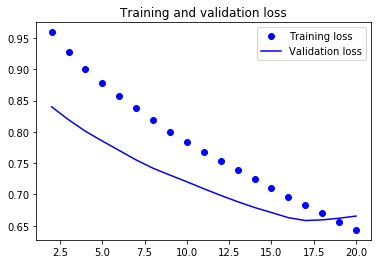

Minimun loss on validation data:	0.658447802066803
Model score:				1.122405767440796
Prediction Goal:			46788.75
Prediction result:			58894.80078125
Absolute error:				12106.05078125


In [98]:
plot_model_results(multi_dict['1_1']['2MLP'], multi_dict['1_1']['prediction_goal'])

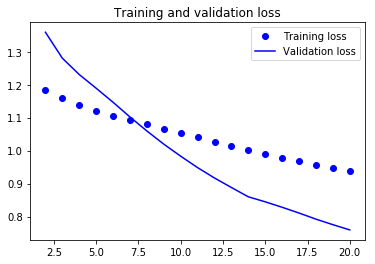

Minimun loss on validation data:	0.7598081231117249
Model score:				0.17794227600097656
Prediction Goal:			75779.45
Prediction result:			72962.546875
Absolute error:				-2816.903124999997


In [99]:
plot_model_results(multi_dict['2_1']['2MLP'], multi_dict['2_1']['prediction_goal'])

#### Simple GRU

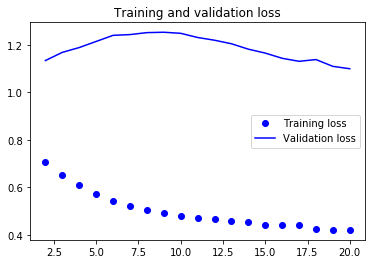

Minimun loss on validation data:	1.0987709760665894
Model score:				0.355072021484375
Prediction Goal:			46788.75
Prediction result:			42959.01171875
Absolute error:				-3829.73828125


In [100]:
plot_model_results(multi_dict['1_1']['GRU'], multi_dict['1_1']['prediction_goal'])

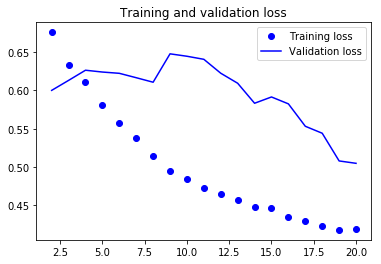

Minimun loss on validation data:	0.5049124360084534
Model score:				1.6154736280441284
Prediction Goal:			75779.45
Prediction result:			50205.8046875
Absolute error:				-25573.645312499997


In [101]:
plot_model_results(multi_dict['2_1']['GRU'], multi_dict['2_1']['prediction_goal'])

#### GRU with Dropout

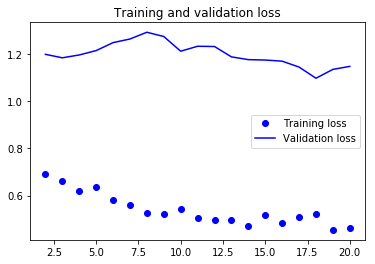

Minimun loss on validation data:	1.0983061790466309
Model score:				0.5857973098754883
Prediction Goal:			46788.75
Prediction result:			40470.453125
Absolute error:				-6318.296875


In [102]:
plot_model_results(multi_dict['1_1']['GRU_drop'], multi_dict['1_1']['prediction_goal'])

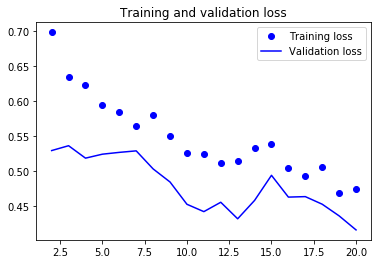

Minimun loss on validation data:	0.4166971445083618
Model score:				2.156371831893921
Prediction Goal:			75779.45
Prediction result:			41643.15234375
Absolute error:				-34136.29765625


In [103]:
plot_model_results(multi_dict['2_1']['GRU_drop'], multi_dict['2_1']['prediction_goal'])

#### Stacked GRU

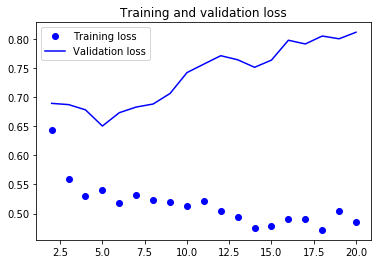

Minimun loss on validation data:	0.6504141688346863
Model score:				1.7440263032913208
Prediction Goal:			46788.75
Prediction result:			27978.01953125
Absolute error:				-18810.73046875


In [104]:
plot_model_results(multi_dict['1_1']['GRU_stack'], multi_dict['1_1']['prediction_goal'])

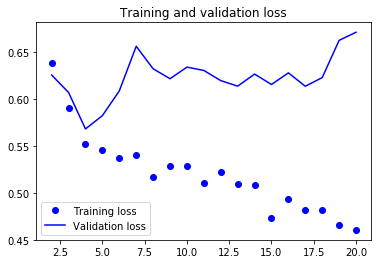

Minimun loss on validation data:	0.5681236982345581
Model score:				2.617286443710327
Prediction Goal:			75779.45
Prediction result:			34346.671875
Absolute error:				-41432.778125


In [105]:
plot_model_results(multi_dict['2_1']['GRU_stack'], multi_dict['2_1']['prediction_goal'])

#### Beurteilung und Schlussfolgerungen

+ Die Modelle sehen leider bei jedem Durchlauf mit identischen Einstellungen komplett unterschiedlich aus.
    + Wenn ein Modell einmal ein gutes Ergebnis liefert, dann nur durch Zufall.
+ Eine Änderung der Epochen hat keinerlei sinnvolle Auswirkungen.
+ Verschiedene Modelle lassen sich nicht miteinander vergleichen.
+ Wir gehen davon aus, dass wir mit genau 100 Samples für Training und Test zu wenig Daten für ein sinnvolles Training zur Verfügung haben.

Ein Rückschritt zur Data Preparation scheint angebracht zu sein, um eventuell mithilfe von Regression mit Bäumen bessere Ergebnisse zu erzielen.

## DATA PREPARATION: Tree Approach

Für diesen Ansatz können wir nicht exakt den Datensatz, der bei der vorherigen Data Preperation (Kapitel 3) erstellt wurde, nutzen, sondern einen modifizierten. Die Modifikationen bestehen bei der Erstellung des Dicts und bei dem Splitten der Datasets.

### Dictionary bauen

In [106]:
tree_dict = {}

Um im Anschluss an die Modellierung (mithilfe von Regressionen) die Ergebnisse vergleichen zu können, benötigen wir ein neues Dictionary, da ansonsten die vorherigen Inhalte überschrieben werden würden.

Wie weiter oben bereits erwähnt, kann diese Zelle im Bedarfsfall aktiviert werden, wenn alle ```Store_Dept``` Kombinationen in das Dictionary geschrieben werden sollen.
Dann muss allerdings die übernächste Zeile deaktiviert werden.

Damit die Prüfungen im weiteren Verlauf alle funktionieren, __MUSS__ die Store-Department-Kombination ```1_1``` __IMMER__ enthalten sein!

In [107]:
store_dept_subgroup = ['1_1']

for store_dept in store_dept_subgroup:
    tree_dict[store_dept] = {}
print("Anzahl an Store_Dept Kombinationen im Dictionary: ",len(tree_dict))

Anzahl an Store_Dept Kombinationen im Dictionary:  1


### Split Datasets

#### Validation je Store und Department

<img src="./media/calendar_tree.jpg" width="500"/>

In [108]:
print("Jüngstes Datum im Datenbestand:",merged_all_for_tree_df.Date.max())

Jüngstes Datum im Datenbestand: 2011-12-23 00:00:00


Auch bei den Bäumen kann die letzte Woche aus den Daten entfernt werden. Somit ist hier ebenfalls der ```2011-12-23``` das jüngste Datum im Datenbestand.  
  
Hier benutzen wir die Woche vom ```10.12.2011``` bis zum ```16.12.2011``` zum Vorhersagen der Weihnachtswoche. Durch das Shiften der Weekly_Sales befindet sich der Wert des ```23.12.2011``` in diesem Eintrag.

In [109]:
for store_dept in tree_dict.keys():
    tmp = merged_all_for_tree_df[merged_all_for_tree_df.Store_Dept == store_dept].iloc[-2:]
    tmp.Weekly_Sales = tmp.Weekly_Sales.shift(periods=-1)
    tree_dict[store_dept]['val_data_df'] = tmp.iloc[0]
    
tree_dict['1_1']['val_data_df']

Store                                 1
Dept                                  1
Date                2011-12-16 00:00:00
Weekly_Sales                    46788.8
days_2_xmas                           9
nw_black_friday                       0
nw_new_year                           0
nw_xmas_1st_week                      0
nw_xmas_2nd_week                      0
nw_xmas_3rd_week                      0
nw_xmas_4th_week                      1
Fuel_Price                        3.159
CPI                             219.179
Unemployment                      7.866
IsHoliday                             0
Temperature_C                     10.91
Size                             151315
type_A                                1
type_B                                0
type_C                                0
Store_Dept                          1_1
Name: 6950, dtype: object

#### Train-Test-Daten je Store und Department

In [110]:
for store_dept in tree_dict.keys():
    tmp = restructure_df_for_target_variable(merged_all_for_tree_df[(merged_all_for_tree_df.Store_Dept == store_dept)])
    tmp.Weekly_Sales = tmp.Weekly_Sales.shift(periods=-1)
    tree_dict[store_dept]['train_test_df'] = tmp.iloc[:-2]

Hier wird der Shift umgesetzt, dazu werden jeweils zwei Zeilen des Dataframes ausgegeben und die Weekly_Sales vom unteren zum oberen versetzt. Zusätzlich werden die Daten restrukturiert, damit die Zielvariable ```Weekly_Sales``` in der letzten Spalte steht.

In [111]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df'])

Der DataFrame ```train_test_df``` sieht damit folgendermaßen aus:

In [112]:
tree_dict['1_1']['train_test_df'].tail()

,Date,nw_black_friday,nw_new_year,nw_xmas_1st_week,nw_xmas_2nd_week,nw_xmas_3rd_week,nw_xmas_4th_week,days_2_xmas,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_C,Weekly_Sales
92,2011-11-11,0,0,0,0,0,0,44,3.297,217.998085,7.866,0,15.06,19050.66
93,2011-11-18,1,0,0,0,0,0,37,3.308,218.220509,7.866,0,16.81,20911.25
94,2011-11-25,0,0,1,0,0,0,30,3.236,218.467621,7.866,1,15.63,25293.49
95,2011-12-02,0,0,0,1,0,0,23,3.172,218.714733,7.866,0,9.39,33305.92
96,2011-12-09,0,0,0,0,1,0,16,3.158,218.961846,7.866,0,6.63,45773.03


#### Train-Test-Split

In [113]:
for store_dept in tree_dict.keys():
    X = tree_dict[store_dept]['train_test_df'].iloc[:,:-1]
    y = tree_dict[store_dept]['train_test_df'].iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1,shuffle=False)
    X_scaler, y_scaler = get_X_y_scalers(tree_dict[store_dept]['train_test_df'])
    X_train_np, foo = scale_data(X_train.drop(columns='Date').values, X_scaler)
    y_train_np, foo = scale_data(y_train.values.reshape(-1, 1), y_scaler)
    X_test_np, foo = scale_data(X_test.drop(columns='Date').values, X_scaler)
    y_test_np, foo = scale_data(y_test.values.reshape(-1, 1), y_scaler)
    foo, X_y_scaler = scale_data(tree_dict[store_dept]['train_test_df'].drop(columns='Date').values)
    tree_dict[store_dept]['X_train'] = X_train_np
    tree_dict[store_dept]['y_train'] = y_train_np
    tree_dict[store_dept]['X_test'] = X_test_np
    tree_dict[store_dept]['X_test_with_dates'] = X_test
    tree_dict[store_dept]['y_test'] = y_test_np
    tree_dict[store_dept]['X_scaler'] = X_scaler
    tree_dict[store_dept]['y_scaler'] = y_scaler
    tree_dict[store_dept]['X_y_scaler'] = X_y_scaler

Da wir bei den Bäumen nur eine Woche zum predicten benutzen kann die Funktion ```train_test_split``` verwendet werden. Die aufgesplitteten Daten skalieren wir mit unserer Funktion aus Kapitel 3.8.3. Zusätzlich zu diesen Datensets speichern wir das nicht skalierte ```X_test``` Dataset in dem Dict ab, damit die Ergebnisse später auf die Datumswerte zurückgeführt werden können (bei ```shuffle=True``` besonders wichtig). Die Normalisierung der Daten findet ebenfalls in dieser Schleife statt.

In [114]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler'])

#### Validation to np

Auch die Validierungsdaten werden in numpy-Arrays konvertiert, damit im weiteren Verlauf damit gearbeitet werden kann.

In [115]:
for store_dept in tree_dict.keys():
    tmp = restructure_df_for_target_variable(pd.DataFrame(tree_dict[store_dept]['val_data_df']).transpose()).drop(columns='Date')
    tmp_np, foo = scale_data(tmp.values, X_y_scaler)
    tree_dict[store_dept]['X_val'] = tmp_np[:,:-1]
    tree_dict[store_dept]['y_val'] = tmp_np[:,-1]

In [116]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler', 'X_val', 'y_val'])

#### Set prediction goal

Die Zielveriable des Validierungsdatensatze speichern wir als ```prediction_goal``` ohne Normalisierung zusätzlich in dem Dictionary.

In [117]:
for store_dept in tree_dict.keys():
    tree_dict[store_dept]['prediction_goal'] = tree_dict[store_dept]['val_data_df'].Weekly_Sales

In [118]:
tree_dict['1_1'].keys()

dict_keys(['val_data_df', 'train_test_df', 'X_train', 'y_train', 'X_test', 'X_test_with_dates', 'y_test', 'X_scaler', 'y_scaler', 'X_y_scaler', 'X_val', 'y_val', 'prediction_goal'])

In [119]:
tree_dict['1_1']['prediction_goal']

46788.75

Mit der Funktion ```inverse_transform``` ,angewendet auf ```y_val```, testen wir, ob der Scaler funktioniert. Das Ergebnis sollte den selben Wert haben wie unser ```prediction_goal```.

In [120]:
tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val'])

array([46788.75])

## MODELING: Tree Approach

Im diesem Abschnitt wird GradientBoosting Regression verwendet, um ein Modell zu trainieren.

### Gradient Boosting Regression

In [121]:
## .ravel() -> transforming column-vector in 1D-Array
gb_regressor = GradientBoostingRegressor(n_estimators=400, random_state=1)
gb_regressor.fit(tree_dict['1_1']['X_train'], tree_dict['1_1']['y_train'].ravel())
print(gb_regressor)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)


In [122]:
tree_dict['1_1']['y_pred'] = gb_regressor.predict(tree_dict['1_1']['X_test'])

### Evaluation der Modelle

#### Mean Absolute Error

Zum Herstellen einer Vergleichbarkeit dieses Modells und der trainierten Modelle aus Kapitel 4 wird auch hier der ***Mean Absolute Error*** als Evaluationsmethode verwendet. Mit dem Wert wird die Höhe der durchschnittlichen Abweichung des Ergebnisses von der Zielveriable beschrieben. Um diesen Wert interpretieren zu können, wird er mit dem ```y_scaler``` denormalisiert.

In [123]:
gb_mae = mean_absolute_error(tree_dict['1_1']['y_test'],tree_dict['1_1']['y_pred'])
tree_dict['1_1']['y_scaler'].inverse_transform(np.array([gb_mae]))

array([28641.37520274])

In [124]:
print("prediction goal:",tree_dict['1_1']['prediction_goal'])

prediction goal: 46788.75


Im Vergleich zu unserem ```prediction_goal``` ```(46788.75)``` ist dies leider kein guter Wert.

#### Feature Importance

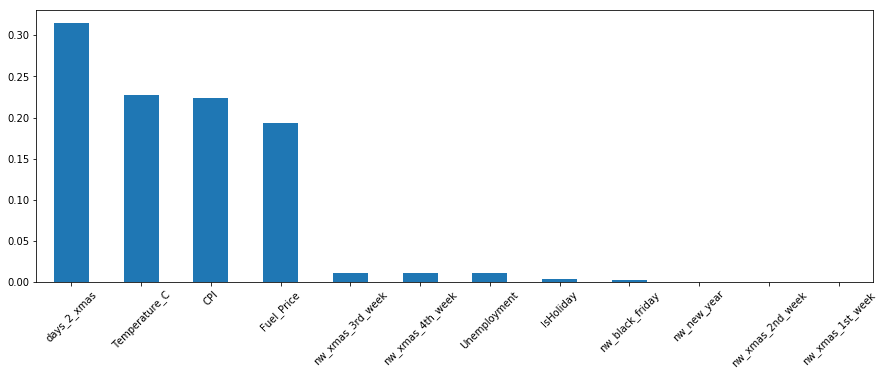

In [125]:
df_feat_imp = pd.DataFrame(gb_regressor.feature_importances_).transpose()
df_feat_imp.columns = tree_dict['1_1']['train_test_df'].columns[1:-1]
df_feat_imp.transpose()
df_feat_imp.transpose().sort_values(0,ascending=False).plot(kind='bar',figsize=(15,5),rot=45,legend=False)
plt.show()

An der Feature Importance kann abgelesen werden, dass die ```days_2_xmas``` unser wichtigstes Attribut darstellt. Durch Veränderung des Datensplits kann die Reihenfolge verändert werden (z.B. Setzt man das Attribut ```schuffle=True``` ist die Temperatur das wichtigste Attribut). Auch durch das Betrachten eines anderen Departments erhält man leicht verändert Werte.

#### Gegenüberstellung der Vorhersage und der Testdaten

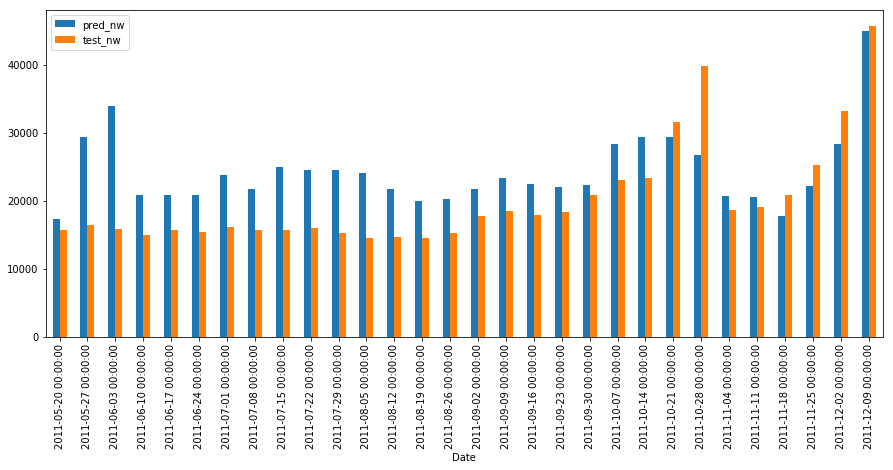

In [126]:
test_dates = tree_dict['1_1']['X_test_with_dates']['Date'].values
plot_y_pred = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_pred'])
plot_y_test = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_test'].ravel())

plot_df = pd.DataFrame([test_dates,plot_y_pred,plot_y_test]).transpose().rename(columns={0:'Date',1:'pred_nw',2:'test_nw'})
plot_df.Date = pd.to_datetime(plot_df.Date)
plot_df.sort_values('Date').plot(x='Date',kind='bar',figsize=(15,6))
plt.show()

**Achtung!:** Die Sales Werte bezeichnen den Sales für die kommende Woche, ausgehend von dem angezeigten Datum!

An dieser Grafik lässt sich ablesen, dass unsere Vorhersage die Steigungen und Gefälle zwar berücksichtigt, aber leider der Wert nicht mit den Testdaten übereinstimmt.  
Um die Weihnachtszeit nähert sich dies allerdings ziemlich nah an, weshalb es eventuell möglich ist unser Ziel, die Weihnachtsverkäufe 2011, mit einem guten Ergebnis vorherzusagen.

#### Prediction with Validation Data

In [127]:
tree_dict['1_1']['y_val_pred'] = gb_regressor.predict(tree_dict['1_1']['X_val'])

In [128]:
gb_val_pred = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val_pred'])
print(gb_val_pred)

[55211.91792304]


#### Beurteilung und Schlussfolgerung

Die prediction für die Weihnachstzeit 2011 liefert ```55211.92``` als Ergebnis. Gegenüber unseres prediction goals in Höhe von ```46788.75``` ist dies leider kein gutes Ergebnis.  
Wenn beim Splitten der Daten ```shuffle=True``` gesetzt ist, werden Werte unter 30.000$ vorhergesagt.  
Ebenfalls getestet haben wir diese Vorhersage mit einem ```DecisionTreeRegressor``` und einem ```RandomForestRegressor```, welche jedoch beide schlechtere Ergebnisse lieferten.

Da die Feature Importance die Temperatur als sehr wichtiges Attribut ausgibt, müssten die Stores weiter unterteilt werden, da das Modell eventuell nur bei Stores in Regionen mit ***normalen*** Klimabedingungen gut funktioniert, aber in unserem Datenset höchstwahrscheinlich auch welche aus Alaska, Florida, etc. enthalten sind.

## EVALUATION: Gegenüberstellung NN und Tree

Für die Evaluation plotten wir die Vorhersage aller Modelle inklusive der ```Weekly_Sales``` aus den Validierungsdaten in ein Balkendiagramm zusätzlich mit dem jeweiligen ***Mean Absolute Error***.

In [129]:
mlp_pred = multi_dict['1_1']['2MLP']['prediction']
gru_pred = multi_dict['1_1']['GRU']['prediction']
gru_drop_pred = multi_dict['1_1']['GRU_drop']['prediction']
gru_stack_pred = multi_dict['1_1']['GRU_stack']['prediction']
y_val = tree_dict['1_1']['y_scaler'].inverse_transform(tree_dict['1_1']['y_val'])
mpl_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['2MLP']['history'].history['val_loss'])]))
gru_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['GRU']['history'].history['val_loss'])]))
gru_drop_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['GRU_drop']['history'].history['val_loss'])]))
gru_stack_mae = multi_dict['1_1']['y_scaler'].inverse_transform(np.array([np.min(multi_dict['1_1']['GRU_stack']['history'].history['val_loss'])]))
gb_tree_mae = tree_dict['1_1']['y_scaler'].inverse_transform(np.array([gb_mae]))

In [130]:
eval_df = pd.DataFrame([[mlp_pred,gru_pred,gru_drop_pred,gru_stack_pred,gb_val_pred[0],y_val[0]]])
eval_df = eval_df.append([[mpl_mae[0],gru_mae[0],gru_drop_mae[0],gru_stack_mae[0],gb_tree_mae[0]]]).reset_index(drop=True)
eval_df = eval_df.rename(index={0:'prediction',1:'MAE'},columns={0:'Prediction 2 Layer Perceptron',1:'Prediction GRU',2:'Prediction GRU Dropout',3:'Prediction Stacked GRU',4:'Prediction GBR',5:'Prediction Goal'})

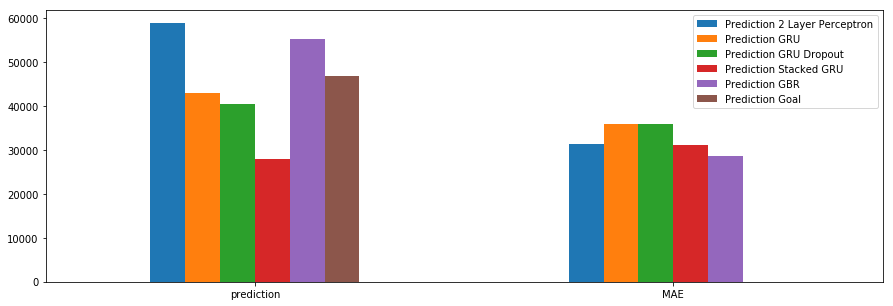

In [131]:
eval_df.plot(kind='bar',rot=0, figsize=(15,5))
plt.show()

Im aktuellen Durchlauf führt die Verwendung von ```GRU mit Dropout``` zum besten Ergebnis. Da dieses Ergebnis allerdings bei jedem Durchlauf stark schwankt, kann hier keine genaue Aussage zu getroffen werden.  
Bei allen 5 Modellierungsvarianten liegt der ***Mean Absolute Error*** ziemlich hoch, da ein Unterschied von 30.000$ zum Ziel als erheblich anzusehen ist.

## DEPLOYMENT / Lessons Learned

Im Folgenden haben wir uns Gedanken gemacht, welche Schritte wir sinnvoll fanden, und was wir beim nächsten Mal anders machen würden.

### Positiv

+ Durch den hohen Fokus auf die Phasen Data Understanding und Data Preparation haben wir gefühlt einen sehr guten Überblick über die Attribute des Datenbestandes und die inneren Zusammenhänge bekommen.
+ Das standardisierte Vorgehen mit dem Vorhalten aller In- und Outputs über ein geschachteltes Dictionary hat uns sehr gut geholfen, den Überblick zu wahren.

### Negativ

+ Die schlechten Ergebnisse bei der Modellierung der neuronalen Netze und unsere Erkenntnis, dass dies wohl an der Datenmenge und den wenigen vergangenen Weihnachten liegt, hat eine fatalistische Grundstimmung befördert.
    + Dies könnte vor allem daran liegen, dass das erste Modell durch reinen Zufall ein exzellentes Ergebnis lieferte.
+ Zusätzlich verursachte der Fokus auf Data Preparation, dass wir sehr wenig Zeit hatten, um uns nochmals mit frischem Kopf auf die Modellierung über Regressoren zu stürzen.
+ Beide Umstände führten dazu, dass wir wenig besonnen manuelle Vergleiche von Ergebnissen mit verschiedenen Parametern anstellten, anstatt ein strukturiertes Vorgehen mit ```Pipelines``` und ```Grid-/Randomsearch``` zu wählen.

Um diese __Probleme in der Zukunft zu vermeiden__, schlagen wir folgendes Vorgehen vor:
+ Schnelle Exploration zu Beginn des Projekts
    + Die "tatsächliche" Größe des Datensatzes wäre uns so bewusst geworden und wir hätten die kommenden Probleme erwarten können.
    + iteratives Vorgehen statt alles brav nach Lehrbuch / CRISP-VGM
+ Dabei bereits automatisierte Evaluation
    + Die Nutzug von Pipelines und automatisierten Hyperparameter-Tuning-Verfahren hätte uns schnell die Wechselhaftigkeit der Ergebnisse gezeigt.
    + Dabei sollten neben den Ergebnissen auch Visualisierungen beispielsweise der ```learning_curve()``` genutzt werden.
+ Im Anschluss feste Meilensteine mit Deadlines für die CRISP-Phasen
    + Dies würde helfen, begeisterte Optimierungen in den ersten Phasen zu Lasten der späteren Phasen durchzuführen.

### Nächste Schritte

+ Dinge, die wir noch spannend gefunden hätten und gerne ermittelt hätten:
    + Ist eine "Deanonymisierung" der einzelnen Stores (beispielsweise über ihre Wetterdaten) im Bezug auf die ca 3000 Counties in den USA möglich? Ein erstes Herangehen wäre die "manuelle" Berechnung der euklidischen Distanz zwischen jedem Store und jedem County. Ein zweiter Schritt wäre die Nutzung von Clustering der Stores in durch die Counties vorgegebenen Cluster.
    + Vergleich über die Store-Department-Kombinationen hinweg un zu prüfen, ob es Kombinationen gibt, die signifikant bessere Ergebnisse liefern